In [1]:
import matplotlib.pyplot as plt

W0411 23:09:33.170122 140701112407872 deprecation.py:506] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1288: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


 Making data frames


In [3]:
def ptetaplot(ptbins,etabins,data,ax,title):
    etabinstext=[]
    ptbinstext=[]
    for i in range(len(ptbins)):
        if i==len(ptbins)-1:
            ptbinstext.append('overflow')
            continue
        ptbinstext.append(str(ptbins[i])+'-'+str(ptbins[i+1]))
    for i in range(len(etabins)):
        if i==len(etabins)-1:
            etabinstext.append('overflow')
            continue
        etabinstext.append(str(etabins[i])+'-'+str(etabins[i+1]))
    import seaborn as sns
    ptbinstext.reverse()
    df = pd.DataFrame(data=data, columns=etabinstext, index=ptbinstext)
    df=df[::-1].reset_index(drop=True)
    sns.heatmap(df, square=False,ax=ax,cmap="Blues",annot=True,cbar=False)
    ax.set_yticklabels(labels=ptbinstext,va='center')
    ax.set_ylabel("$p_T$ bins(GeV)")
    ax.set_xlabel("$\eta$ bins")
    ax.set_title(title)
    
def ptetaRwtTested(Sigdf,Bkgdf,ptbins,etabins,Wt,NWt,ele_pt='ele_pt',scl_eta='scl_eta',od='.'):
    print("Reweighting Now...")
    Sdata=[]
    Bdata=[]
    Wtdata=[]
    for i in range(len(ptbins)):
        Bdatai=[]
        Sdatai=[]
        Wtdatai=[]
        for j in range(len(etabins)):
            if i==(len(ptbins)-1) and j<(len(etabins)-1):
                sel=ele_pt+'>@ptbins[@i] & '+scl_eta+'>@etabins[@j] & '+scl_eta+'<@etabins[@j+1]'
                Bsum=Bkgdf.query(sel)[Wt].sum()
                Bdatai.append(Bsum)
                Ssum=Sigdf.query(sel)[Wt].sum()
                Sdatai.append(Ssum)
                Bkgdf.loc[sel,NWt]=Ssum/Bsum
                if Bsum>0:
                    Wtdatai.append(Ssum/Bsum)
                else:
                    Wtdatai.append(1)
                continue 
            if i<(len(ptbins)-1) and j==(len(etabins)-1):
                sel=ele_pt+'>@ptbins[@i] & '+ele_pt+'<=@ptbins[@i+1] & '+scl_eta+'>@etabins[@j]'
                Bsum=Bkgdf.query(sel)[Wt].sum()
                Bdatai.append(Bsum)
                Ssum=Sigdf.query(sel)[Wt].sum()
                Sdatai.append(Ssum)
                Bkgdf.loc[sel,NWt]=Ssum/Bsum
                if Ssum>0:
                    Wtdatai.append(Ssum/Bsum)
                else:
                    Wtdatai.append(1)
                continue 
            if i==(len(ptbins)-1) and j==(len(etabins)-1):
                sel=ele_pt+'>@ptbins[@i] & '+scl_eta+'>@etabins[@j]'
                Bsum=Bkgdf.query(sel)[Wt].sum()
                Bdatai.append(Bsum)
                Ssum=Sigdf.query(sel)[Wt].sum()
                Sdatai.append(Ssum)
                Bkgdf.loc[sel,NWt]=Ssum/Bsum
                if Ssum>0:
                    Wtdatai.append(Ssum/Bsum)
                else:
                    Wtdatai.append(1)
                continue 
            sel=ele_pt+'>@ptbins[@i] & '+ele_pt+'<=@ptbins[@i+1] & scl_eta>@etabins[@j] & '+scl_eta+'<@etabins[@j+1]'
            Bsum=Bkgdf.query(sel)[Wt].sum()
            Bdatai.append(Bsum)
            Ssum=Sigdf.query(sel)[Wt].sum()
            Sdatai.append(Ssum)
            Bkgdf.loc[sel,NWt]=Ssum/Bsum
            if Ssum>0:
                Wtdatai.append(Ssum/Bsum)
            else:
                Wtdatai.append(1)
        Bdata.append(Bdatai)
        Sdata.append(Sdatai)
        Wtdata.append(Wtdatai)
    Sigdf[NWt]=Sigdf[Wt]
    Bkgdf[NWt]*=Bkgdf[Wt]
    BdataWtd=[]
    for Wtdatal, Bdatal in zip(Wtdata,Bdata):
        BdataWtd.append([a * b for a, b in zip(Wtdatal, Bdatal)])
    fig, axes = plt.subplots(1,4,figsize=(20,5))
    ptetaplot(ptbins,etabins,Sdata,axes[0],"Signal Bins")
    ptetaplot(ptbins,etabins,Bdata,axes[1],"Background Bins")
    ptetaplot(ptbins,etabins,BdataWtd,axes[2],"Background Bins Reweighted")
    ptetaplot(ptbins,etabins,Wtdata,axes[3],"Background Bins per event weight")
    plt.savefig(od+"/ReweightingPlot.pdf")
    plt.savefig(od+"/ReweightingPlot.pdf")
    return Sigdf[NWt],Bkgdf[NWt]

/usr/local/bin/start_ipykernel.py:52: RuntimeWarning: invalid value encountered in true_divide
/usr/local/bin/start_ipykernel.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/bin/start_ipykernel.py:64: RuntimeWarning: invalid value encountered in true_divide


Signal Bins
Background Bins
Background Bins Reweighted
Background Bins per event weight


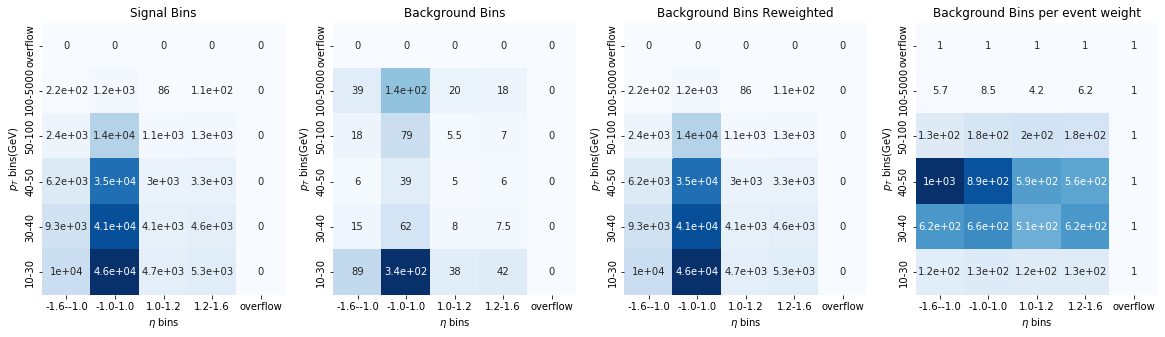

In [5]:
def dataptetastrip(data1):
    data=data1
    for ptlist in data:
        ptlist[-2]=ptlist[-2]+ptlist[-1]
        ptlist.pop(-1)
    data[-2] = [sum(i) for i in zip(data[-2], data[-1])]
    data.pop(-1)
    return data